# Modeling the Probability Distribution

In [397]:
import math
import numpy as np
from dataclasses import dataclass, field
from typing import List, Tuple
from pprint import pprint
import matplotlib.pyplot as plt

In [398]:
@dataclass
class Marker:
    name: str
    median_mom_down: float
    median_mom_control: float
    log_sd_down: float = 0.0 # log of the sd of the marker in Down Syndrome cases
    log_sd_control: float = 0.0 # log of the sd of the marker in Control cases

In [399]:
@dataclass
class PopulationConfig:
    """
    Maternal Age is Normally distributed.
    """
    maternal_age_mean: float = 27.0 # Mean maternal age in years
    maternal_age_sd: float = 5.5 # SD of maternal age in years

    down_syndrome_prevalence: float = 1/700 # Prevalence of Down syndrome in the population

@dataclass
class MarkersConfig:
    """
    Config for the various markers being analysed
    """
    markers: list[Marker] = field(default_factory=list)
    
    correlation_matrix_down: np.ndarray = field(default_factory=lambda: np.eye(1)) # Correlatiuon matrix for Down syndrome cases
    correlation_matrix_control: np.ndarray = field(default_factory=lambda: np.eye(1)) # Correlation matrix for control cases

    def __post_init__(self):
        self.markers = [
            Marker(name="Free B-hCG", median_mom_down=1.70, median_mom_control=1.01, log_sd_down=0.28, log_sd_control=0.27),
            Marker(name="PAPP-A", median_mom_down=0.49, median_mom_control=1.00, log_sd_down=0.31, log_sd_control=0.25),
            Marker(name="NT", median_mom_down=1.74, median_mom_control=1.01, log_sd_down=0.23, log_sd_control=0.13),
        ]

        markers_count = len(self.markers)
        self.correlation_matrix_down = self.correlation_matrix_control = np.eye(markers_count)

In [400]:
pop_config = PopulationConfig(
    maternal_age_mean = 27.0,
    maternal_age_sd = 5.5
)

marker_config = MarkersConfig()

pprint(pop_config)
pprint(marker_config)

PopulationConfig(maternal_age_mean=27.0,
                 maternal_age_sd=5.5,
                 down_syndrome_prevalence=0.0014285714285714286)
MarkersConfig(markers=[Marker(name='Free B-hCG',
                              median_mom_down=1.7,
                              median_mom_control=1.01,
                              log_sd_down=0.28,
                              log_sd_control=0.27),
                       Marker(name='PAPP-A',
                              median_mom_down=0.49,
                              median_mom_control=1.0,
                              log_sd_down=0.31,
                              log_sd_control=0.25),
                       Marker(name='NT',
                              median_mom_down=1.74,
                              median_mom_control=1.01,
                              log_sd_down=0.23,
                              log_sd_control=0.13)],
              correlation_matrix_down=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [401]:
config.correlation_matrix_control

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [402]:
sample_size: int = 100_000

is_down = np.random.random(sample_size) < pop_config.down_syndrome_prevalence

sampled_prevalence = (np.sum(is_down) / sample_size)
print(sampled_prevalence)

assert np.allclose(sampled_prevalence, pop_config.down_syndrome_prevalence, atol=1/2000), "Sampled prevalence should be similar to expected prevalence"

0.00158


In [403]:
min_max = lambda v, tol: ((v - tol) * 100, (v + tol) * 100)

min_max(0.0014, 1/2000)

(0.09, 0.19)

Let X be a random variable with a log normal distribution  $N(\mu_X, \sigma^2_X$). Then the $ln(X)$ has the mean $\mu$ and variance $\sigma^2$.

$$
\begin{align}
\mu &= ln({\frac{\mu^2_X}{\sqrt{\mu^2_X + \sigma^2_X}}}) \\
\sigma^2 &= ln(1 + \frac{\sigma^2_X}{\mu^2_X})
\end{align}
$$

In [404]:
mu = np.log(pop_config.maternal_age_mean**2 / (np.sqrt(pop_config.maternal_age_mean**2 + pop_config.maternal_age_sd**2)))
sig2 = np.log(1 + (pop_config.maternal_age_sd ** 2 / pop_config.maternal_age_mean ** 2))
sig = np.sqrt(sig2)

log_maternal_ages = np.random.normal(
    mu,
    sig,
    sample_size
)

print(
    mu, sig
)

log_maternal_ages

3.275508180045729 0.20163673255932293


array([2.95944013, 3.30884324, 3.07669179, ..., 3.41046984, 3.38456257,
       3.45887912])

In [405]:
def summary_stats(data: np.ndarray):
    print(f"X ~ N(μ, σ^2): N({np.mean(data):.4f}, {np.std(data)**2:.4f})")
    print(f"Range: {np.min(data):.4f} ≤ X ≤ {np.max(data):.4f}")

    print(f"median (M): {np.median(data):.4f}\n")

(array([1.000e+00, 6.000e+00, 2.100e+01, 5.200e+01, 1.200e+02, 3.330e+02,
        6.600e+02, 1.140e+03, 1.849e+03, 2.801e+03, 3.748e+03, 4.861e+03,
        5.840e+03, 6.628e+03, 7.131e+03, 7.409e+03, 7.410e+03, 7.152e+03,
        6.611e+03, 6.068e+03, 5.389e+03, 4.709e+03, 3.949e+03, 3.347e+03,
        2.747e+03, 2.255e+03, 1.726e+03, 1.442e+03, 1.123e+03, 8.400e+02,
        6.260e+02, 5.020e+02, 4.060e+02, 3.090e+02, 2.050e+02, 1.520e+02,
        1.280e+02, 7.700e+01, 5.700e+01, 6.100e+01, 3.500e+01, 1.900e+01,
        1.900e+01, 1.000e+01, 8.000e+00, 1.000e+01, 2.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 9.87970597, 10.85373216, 11.82775835, 12.80178454, 13.77581073,
        14.74983692, 15.72386311, 16.6978893 , 17.67191549, 18.64594168,
        19.61996787, 20.59399406, 21.56802024, 22.54204643, 23.51607262,
        24.49009881, 25.464125  , 26.43815119, 27.41217738, 28.38620357,
        29.36022976, 30.33425595, 31.30828214, 32.28230832, 33.25633451,
        34.

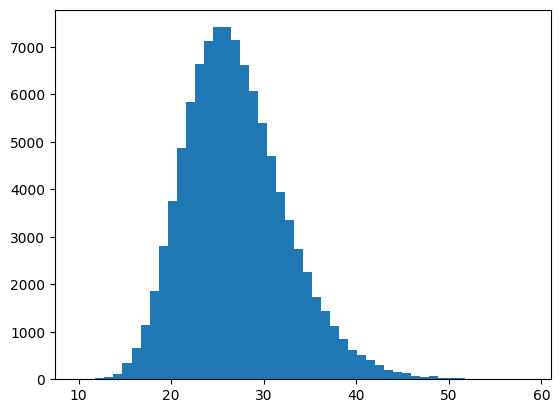

In [406]:
maternal_age = np.exp(log_maternal_ages)
plt.hist(maternal_age, bins=50)

In [407]:
summary_stats(log_maternal_ages)
summary_stats(np.exp(log_maternal_ages))

X ~ N(μ, σ^2): N(3.2748, 0.0408)
Range: 2.2905 ≤ X ≤ 4.0704
median (M): 3.2747

X ~ N(μ, σ^2): N(26.9808, 30.2446)
Range: 9.8797 ≤ X ≤ 58.5810
median (M): 26.4363



$$
Y = ln(X), Y \sim N(\mu, \sigma)
$$

$$
M = e^\mu
=> ln(M) = \mu
$$

In [408]:
mean_down = np.log([m.median_mom_down for m in marker_config.markers])
mean_control = np.log([m.median_mom_control for m in marker_config.markers])

mean_down, mean_control

(array([ 0.53062825, -0.71334989,  0.55388511]),
 array([0.00995033, 0.        , 0.00995033]))

## Covariance Matrices and Multivariate Distribution

Assuming that $X_i$ for all $i=0...n$ are independent random variables, the $Cov(X_i, Y_j) = 0$ and hence we get the following diagnol form containing only the variances.

$$
Cov(X, X) = Var(X) = \begin{bmatrix}
Var(X_1) & 0 & 0\\
0 & Var(X_2) & 0\\
0 & 0 & Var(X_3)
\end{bmatrix}
$$

The covariance matrix is a diagonal matrix containing only the variances of each of the markers.

In [409]:
cov_down = np.diag([m.log_sd_down**2 for m in marker_config.markers])
cov_control = np.diag([m.log_sd_control**2 for m in marker_config.markers])

cov_down, cov_control

(array([[0.0784, 0.    , 0.    ],
        [0.    , 0.0961, 0.    ],
        [0.    , 0.    , 0.0529]]),
 array([[0.0729, 0.    , 0.    ],
        [0.    , 0.0625, 0.    ],
        [0.    , 0.    , 0.0169]]))

In [410]:
correlation_matrix_down = np.array(
    [[1., 0.191, 0.],
     [0.191, 1., 0.],
     [0., 0., 1.]]
)

In [411]:
correlation_matrix_control = np.array(
    [[1., 0.186, 0.],
     [0.186, 1., 0.],
     [0., 0., 1.]]
)

In [412]:
cov_down.shape, correlation_matrix_down.shape

((3, 3), (3, 3))

In [413]:
cov_down = np.sqrt(cov_down) @ correlation_matrix_down @ np.sqrt(cov_down)
cov_down

array([[0.0784   , 0.0165788, 0.       ],
       [0.0165788, 0.0961   , 0.       ],
       [0.       , 0.       , 0.0529   ]])

In [414]:
cov_control = np.sqrt(cov_control) @ correlation_matrix_control @ np.sqrt(cov_control)
cov_control

array([[0.0729  , 0.012555, 0.      ],
       [0.012555, 0.0625  , 0.      ],
       [0.      , 0.      , 0.0169  ]])

In [415]:
log_marker_values_down = np.random.multivariate_normal(
    mean_down,
    cov_down,
    np.sum(is_down)
)

log_marker_values_down, log_marker_values_down.shape

(array([[ 7.92637306e-01, -6.25442737e-01,  2.91406031e-01],
        [ 7.11881015e-01, -9.12072672e-01,  9.19873395e-01],
        [ 4.95040615e-01, -3.25126354e-01,  5.11020872e-01],
        [ 3.20752995e-01, -9.81852108e-01,  3.99680760e-01],
        [ 4.03824420e-01, -9.42267684e-01, -4.71422386e-02],
        [ 6.90955335e-01, -1.33213374e+00,  6.87189970e-01],
        [-5.47696889e-01, -1.10582127e+00,  8.30730923e-01],
        [ 6.83661033e-01, -1.37157094e-01,  4.54893557e-01],
        [ 3.82695653e-01, -5.53495796e-01,  4.76828923e-01],
        [-2.80556570e-01, -7.22151478e-01,  4.70742833e-01],
        [ 1.64110182e-01, -1.09916867e+00,  7.22108341e-01],
        [ 6.55299951e-01, -7.41294183e-01,  1.35689925e-01],
        [ 1.23049555e+00, -4.67505924e-01,  6.89741589e-01],
        [ 4.86109634e-02, -1.17927189e+00,  8.95105549e-01],
        [ 1.97938818e-01, -7.55913371e-01,  3.95673739e-01],
        [ 8.03379877e-01, -7.62466474e-01,  5.30802357e-01],
        [ 2.98341183e-01

In [416]:
log_marker_values_control = np.random.multivariate_normal(
    mean_control,
    cov_control,
    np.sum(~is_down)
)

log_marker_values_control, log_marker_values_control.shape

(array([[-0.11497528,  0.28051598,  0.2491788 ],
        [-0.32430664, -0.147406  , -0.18140637],
        [-0.40573785,  0.66809531,  0.06793337],
        ...,
        [ 0.07578579,  0.03609642,  0.18519711],
        [ 0.37674396, -0.09690599, -0.34386122],
        [ 0.052934  ,  0.28484571, -0.09235188]]),
 (99842, 3))

In [417]:
log_marker_values = np.zeros((sample_size, len(marker_config.markers)))
log_marker_values.shape

(100000, 3)

In [418]:
log_marker_values[is_down] = log_marker_values_down
log_marker_values[~is_down] = log_marker_values_control

In [419]:
log_marker_values

array([[-0.11497528,  0.28051598,  0.2491788 ],
       [-0.32430664, -0.147406  , -0.18140637],
       [-0.40573785,  0.66809531,  0.06793337],
       ...,
       [ 0.07578579,  0.03609642,  0.18519711],
       [ 0.37674396, -0.09690599, -0.34386122],
       [ 0.052934  ,  0.28484571, -0.09235188]])

In [420]:
marker_values = np.exp(log_marker_values)
marker_values

array([[0.89138818, 1.3238127 , 1.28297141],
       [0.7230285 , 0.86294355, 0.83409634],
       [0.66648486, 1.95051865, 1.07029399],
       ...,
       [1.07873148, 1.03675581, 1.20345563],
       [1.45753108, 0.90764133, 0.70902732],
       [1.05436005, 1.32955687, 0.91178426]])

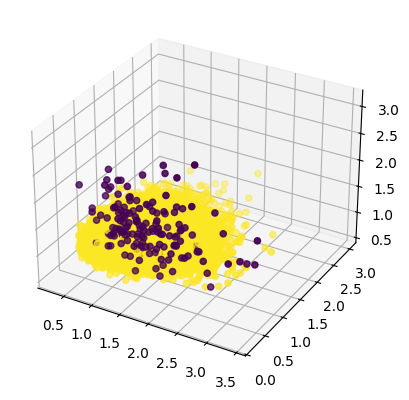

In [421]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    marker_values[:,0], 
    marker_values[:,1],  
    marker_values[:,2],
    # maternal_age,
    c=~is_down
)

In [422]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

def create_interactive_plot(marker_values, maternal_age, is_down, marker_config, z_axis='maternal_age'):
    # pio.renderers.default = "browser"

    # Separate Down syndrome and control cases
    down_indices = np.where(is_down)[0]
    control_indices = np.where(~is_down)[0]

    # Determine z-axis values
    if z_axis == 'maternal_age':
        z_values = maternal_age
        z_axis_title = 'Maternal Age'
    elif z_axis == 'NT':
        z_values = marker_values[:, 2]
        z_axis_title = marker_config.markers[2].name
    else:
        raise ValueError("z_axis must be either 'maternal_age' or 'NT'")

    # Create scatter plots for Down syndrome and control cases separately
    scatter_down = go.Scatter3d(
        x=marker_values[down_indices, 0],
        y=marker_values[down_indices, 1],
        z=z_values[down_indices],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            symbol='diamond',
        ),
        name='Down Syndrome',
        text=[f"Age: {age:.1f}, {z_axis_title}: {z:.2f}, Down Syndrome: True" 
              for age, z in zip(maternal_age[down_indices], z_values[down_indices])],
        hoverinfo="text"
    )

    scatter_control = go.Scatter3d(
        x=marker_values[control_indices, 0],
        y=marker_values[control_indices, 1],
        z=z_values[control_indices],
        mode='markers',
        marker=dict(
            size=3,
            color='blue',
            opacity=0.1,
        ),
        name='Control',
        text=[f"Age: {age:.1f}, {z_axis_title}: {z:.2f}, Down Syndrome: False" 
              for age, z in zip(maternal_age[control_indices], z_values[control_indices])],
        hoverinfo="text"
    )

    # Create the layout
    layout = go.Layout(
        scene=dict(
            xaxis_title=marker_config.markers[0].name,
            yaxis_title=marker_config.markers[1].name,
            zaxis_title=z_axis_title,
        ),
        title="Down Syndrome Screening Markers",
        width=900,
        height=700,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )

    # Create the figure and show it
    fig = go.Figure(data=[scatter_control, scatter_down], layout=layout)

    # Add sliders for marker cutoffs
    for i, marker in enumerate([marker_config.markers[0].name, marker_config.markers[1].name]):
        fig.update_layout(
            sliders=[dict(
                active=0,
                currentvalue={"prefix": f"{marker} Cutoff: "},
                pad={"t": 50},
                steps=[dict(
                    method='update',
                    args=[{'visible': [True, True]},
                          {'title': f'{marker} Cutoff: {cutoff:.2f}'}],
                    label=str(cutoff)
                ) for cutoff in np.linspace(0.5, 2, 20)]
            )]
        )

    fig.show()

In [423]:
create_interactive_plot(marker_values, maternal_age, is_down, marker_config, z_axis='maternal_age')

In [424]:
# create_interactive_plot(marker_values, maternal_age, is_down, marker_config, z_axis='maternal_age')